C:\Users\ARRAY COMP\AppData\Local\Temp\ipykernel_8896\2561765849.py:30: RuntimeWarning: overflow encountered in scalar subtract
  G.add_edge(idx, idx + w, weight=abs(image[i, j] - image[i+1, j]))
C:\Users\ARRAY COMP\AppData\Local\Temp\ipykernel_8896\2561765849.py:32: RuntimeWarning: overflow encountered in scalar subtract
  G.add_edge(idx, idx + 1, weight=abs(image[i, j] - image[i, j+1]))


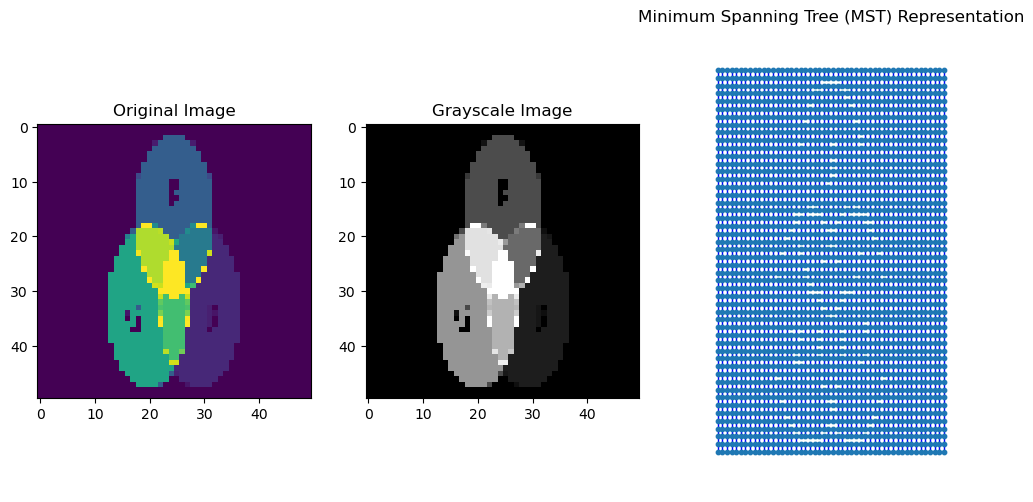

Shape: (50, 50)  Dim: 2
Graph with 2500 nodes and 2499 edges


In [7]:
import numpy as np
import cv2
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from sklearn.decomposition import PCA

# Load sample grayscale image
image = cv2.imread('gb2.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (50, 50))  # Resize for efficiency

# Convert image to graph representation
h, w = image.shape
pixels = [(i, j) for i in range(h) for j in range(w)]
intensities = np.array([image[i, j] for i, j in pixels]).reshape(-1, 1)

# Compute adjacency based on pixel intensity distances
dist_matrix = distance_matrix(intensities, intensities)

# Build a graph with weighted edges based on intensity difference
G = nx.Graph()
for idx, (i, j) in enumerate(pixels):
    G.add_node(idx, pos=(j, -i), intensity=image[i, j])

# Connect each pixel to its neighbors
for i in range(h):
    for j in range(w):
        idx = i * w + j
        if i < h - 1:  # Vertical connection
            G.add_edge(idx, idx + w, weight=abs(image[i, j] - image[i+1, j]))
        if j < w - 1:  # Horizontal connection
            G.add_edge(idx, idx + 1, weight=abs(image[i, j] - image[i, j+1]))

# Compute Minimum Spanning Tree (MST)
MST = nx.minimum_spanning_tree(G, weight='weight')

# Extract MST edges
mst_edges = list(MST.edges)

# Visualizing the original and MST-reduced image
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("on")

# Original Image
plt.subplot(1, 3, 2)
plt.imshow(image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("on")

# MST Representation
plt.subplot(1, 3, 3)
nx.draw(MST, pos=nx.get_node_attributes(G, 'pos'), node_size=10, edge_color="blue", with_labels=False)
plt.title("Minimum Spanning Tree (MST) Representation")

plt.show()
 
print("Shape:", image.shape," Dim:",image.ndim) 
print(MST) 


In [19]:
mst_edges

[(0, 50),
 (0, 1),
 (1, 51),
 (1, 2),
 (2, 52),
 (2, 3),
 (3, 53),
 (3, 4),
 (4, 54),
 (4, 5),
 (5, 55),
 (5, 6),
 (6, 56),
 (6, 7),
 (7, 57),
 (7, 8),
 (8, 58),
 (8, 9),
 (9, 59),
 (9, 10),
 (10, 60),
 (10, 11),
 (11, 61),
 (11, 12),
 (12, 62),
 (12, 13),
 (13, 63),
 (13, 14),
 (14, 64),
 (14, 15),
 (15, 65),
 (15, 16),
 (16, 66),
 (16, 17),
 (17, 67),
 (17, 18),
 (18, 68),
 (18, 19),
 (19, 69),
 (19, 20),
 (20, 70),
 (20, 21),
 (21, 71),
 (21, 22),
 (22, 72),
 (22, 23),
 (23, 73),
 (23, 24),
 (24, 74),
 (24, 25),
 (25, 75),
 (25, 26),
 (26, 76),
 (26, 27),
 (27, 77),
 (27, 28),
 (28, 78),
 (28, 29),
 (29, 79),
 (29, 30),
 (30, 80),
 (30, 31),
 (31, 81),
 (31, 32),
 (32, 82),
 (32, 33),
 (33, 83),
 (33, 34),
 (34, 84),
 (34, 35),
 (35, 85),
 (35, 36),
 (36, 86),
 (36, 37),
 (37, 87),
 (37, 38),
 (38, 88),
 (38, 39),
 (39, 89),
 (39, 40),
 (40, 90),
 (40, 41),
 (41, 91),
 (41, 42),
 (42, 92),
 (42, 43),
 (43, 93),
 (43, 44),
 (44, 94),
 (44, 45),
 (45, 95),
 (45, 46),
 (46, 96),
 (46, 

In [8]:
# Mengimpor pustaka yang diperlukan
import pandas as pd

# Memuat dataset
file_path = "grayscale_50x50_dataset.csv"
dataset = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset untuk verifikasi
dataset.head()


,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
0,0,161,45,234,29,173,28,213,5,145,...,252,39,188,23,130,40,161,25,255,30
1,0,161,45,234,29,173,28,213,5,145,...,252,39,188,23,130,40,161,25,255,30
2,0,161,45,234,29,173,28,213,5,145,...,252,39,188,23,130,40,161,25,255,30
3,0,161,45,234,29,173,28,213,5,145,...,252,39,188,23,130,40,161,25,255,30
4,0,161,45,234,29,173,28,213,5,145,...,252,39,188,23,130,40,161,25,255,30


In [15]:
#PURE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix  # Pastikan ini diimpor!
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Split dataset into features (X) and labels (y)
X = dataset.iloc[:, 1:].values  # Pixel values
y = dataset.iloc[:, 0].values   # Labels

# Split data into training (80%) and testing (20%) sets using Holdout method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Using k=5 as default
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
#import ace_tools as tools  
#tools.display_dataframe_to_user(name="Confusion Matrix", dataframe=pd.DataFrame(conf_matrix))
dataframe=pd.DataFrame(conf_matrix)
display(dataframe)
# Show accuracy
accuracy


,0,1,2,3,4,5,6,7,8,9
0,20,0,0,0,0,0,0,0,0,0
1,0,13,0,0,0,0,0,0,0,0
2,0,0,27,0,0,0,0,0,0,0
3,0,0,0,21,0,0,0,0,0,0
4,0,0,0,0,15,0,0,0,0,0
5,0,0,0,0,0,22,0,0,0,0
6,0,0,0,0,0,0,25,0,0,0
7,0,0,0,0,0,0,0,13,0,0
8,0,0,0,0,0,0,0,0,23,0
9,0,0,0,0,0,0,0,0,0,21


1.0

In [17]:
#PCA
import pandas as pd
from sklearn.model_selection import train_test_split  # Pastikan ini diimpor!
#PCA
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # Reduce to 50 principal components
X_reduced = pca.fit_transform(X)

# Split reduced data into training (80%) and testing (20%) sets using Holdout method
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train KNN model on reduced data
knn_red = KNeighborsClassifier(n_neighbors=5)
knn_red.fit(X_train_red, y_train_red)

# Predict on test data
y_pred_red = knn_red.predict(X_test_red)

# Compute accuracy after PCA
accuracy_red = accuracy_score(y_test_red, y_pred_red)

# Compute confusion matrix after PCA
conf_matrix_red = confusion_matrix(y_test_red, y_pred_red)

# Display results
#tools.display_dataframe_to_user(name="Confusion Matrix with PCA", dataframe=pd.DataFrame(conf_matrix_red))
dataframe=pd.DataFrame(conf_matrix_red)
display(dataframe)

# Show accuracy after PCA
accuracy_red


,0,1,2,3,4,5,6,7,8,9
0,20,0,0,0,0,0,0,0,0,0
1,0,13,0,0,0,0,0,0,0,0
2,0,0,27,0,0,0,0,0,0,0
3,0,0,0,21,0,0,0,0,0,0
4,0,0,0,0,15,0,0,0,0,0
5,0,0,0,0,0,22,0,0,0,0
6,0,0,0,0,0,0,25,0,0,0
7,0,0,0,0,0,0,0,13,0,0
8,0,0,0,0,0,0,0,0,23,0
9,0,0,0,0,0,0,0,0,0,21


1.0

In [18]:
#MST
import networkx as nx
from scipy.spatial import distance_matrix

# Function to convert grayscale image to MST features
def image_to_mst_features(image):
    h, w = 50, 50  # Assuming fixed size 50x50
    pixels = np.arange(h * w).reshape(h, w)  # Pixel indices

    # Compute adjacency based on pixel intensity distances
    dist_matrix = distance_matrix(image.reshape(-1, 1), image.reshape(-1, 1))

    # Create graph and add edges
    G = nx.Graph()
    for i in range(h * w):
        G.add_node(i, intensity=image.flatten()[i])

    # Connect neighboring pixels (4-connectivity)
    for i in range(h):
        for j in range(w):
            idx = i * w + j
            if i < h - 1:  # Vertical
                G.add_edge(idx, idx + w, weight=abs(image[i, j] - image[i + 1, j]))
            if j < w - 1:  # Horizontal
                G.add_edge(idx, idx + 1, weight=abs(image[i, j] - image[i, j + 1]))

    # Compute MST
    MST = nx.minimum_spanning_tree(G, weight='weight')

    # Extract edge weights as feature vector
    mst_features = np.array([G[u][v]['weight'] for u, v in MST.edges()])
    return np.pad(mst_features, (0, (h * w - 1) - len(mst_features)), 'constant')  # Ensure fixed length

# Convert entire dataset to MST-based feature representation
X_mst = np.array([image_to_mst_features(img.reshape(50, 50)) for img in X])

# Split MST-reduced data into training (80%) and testing (20%) sets using Holdout method
X_train_mst, X_test_mst, y_train_mst, y_test_mst = train_test_split(X_mst, y, test_size=0.2, random_state=42)

# Train KNN model on MST-based features
knn_mst = KNeighborsClassifier(n_neighbors=5)
knn_mst.fit(X_train_mst, y_train_mst)

# Predict on test data
y_pred_mst = knn_mst.predict(X_test_mst)

# Compute accuracy after MST conversion
accuracy_mst = accuracy_score(y_test_mst, y_pred_mst)

# Compute confusion matrix after MST conversion
conf_matrix_mst = confusion_matrix(y_test_mst, y_pred_mst)

# Display results
#tools.display_dataframe_to_user(name="Confusion Matrix with MST", dataframe=pd.DataFrame(conf_matrix_mst))
dataframe=pd.DataFrame(conf_matrix_mst)
display(dataframe)
# Show accuracy after MST conversion
accuracy_mst


,0,1,2,3,4,5,6,7,8,9
0,20,0,0,0,0,0,0,0,0,0
1,0,13,0,0,0,0,0,0,0,0
2,0,0,27,0,0,0,0,0,0,0
3,0,0,0,21,0,0,0,0,0,0
4,0,0,0,0,15,0,0,0,0,0
5,0,0,0,0,0,22,0,0,0,0
6,0,0,0,0,0,0,25,0,0,0
7,0,0,0,0,0,0,0,13,0,0
8,0,0,0,0,0,0,0,0,23,0
9,0,0,0,0,0,0,0,0,0,21


1.0

In [20]:
# Import necessary libraries
import networkx as nx
import cv2
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Load dataset
file_path = "grayscale_50x50_dataset.csv"
dataset = pd.read_csv(file_path)

# Step 2: Extract labels and pixel values
X = dataset.iloc[:, 1:].values  # Pixel values
y = dataset.iloc[:, 0].values   # Labels

# Function to convert an image to a graph and extract MST features
def image_to_mst_features(image):
    h, w = 50, 50  # Image dimensions
    pixels = np.arange(h * w).reshape(h, w)  # Pixel indices

    # Compute adjacency based on pixel intensity differences
    dist_matrix = distance_matrix(image.reshape(-1, 1), image.reshape(-1, 1))

    # Create a graph and add nodes
    G = nx.Graph()
    for i in range(h * w):
        G.add_node(i, intensity=image.flatten()[i])

    # Connect each pixel to its neighbors (4-connectivity)
    for i in range(h):
        for j in range(w):
            idx = i * w + j
            if i < h - 1:  # Vertical connection
                G.add_edge(idx, idx + w, weight=abs(image[i, j] - image[i + 1, j]))
            if j < w - 1:  # Horizontal connection
                G.add_edge(idx, idx + 1, weight=abs(image[i, j] - image[i, j + 1]))

    # Compute MST
    MST = nx.minimum_spanning_tree(G, weight='weight')

    # Extract MST edge weights as feature vector
    mst_features = np.array([G[u][v]['weight'] for u, v in MST.edges()])
    
    # Ensure fixed-length feature vector (padded if needed)
    return np.pad(mst_features, (0, (h * w - 1) - len(mst_features)), 'constant')

# Step 3: Convert dataset images to MST-based feature representation
X_mst = np.array([image_to_mst_features(img.reshape(50, 50)) for img in X])

# Step 4: Split dataset into training (80%) and testing (20%) sets using Holdout method
X_train_mst, X_test_mst, y_train_mst, y_test_mst = train_test_split(X_mst, y, test_size=0.2, random_state=42)

# Step 5: Train KNN model on MST-based features
knn_mst = KNeighborsClassifier(n_neighbors=5)
knn_mst.fit(X_train_mst, y_train_mst)

# Step 6: Predict on test data
y_pred_mst = knn_mst.predict(X_test_mst)

# Step 7: Compute accuracy after MST conversion
accuracy_mst = accuracy_score(y_test_mst, y_pred_mst)

# Step 8: Compute confusion matrix after MST conversion
conf_matrix_mst = confusion_matrix(y_test_mst, y_pred_mst)

# Display results
#import ace_tools as tools  
#tools.display_dataframe_to_user(name="Confusion Matrix with MST", dataframe=pd.DataFrame(conf_matrix_mst))
dataframe=pd.DataFrame(conf_matrix_mst)
display(dataframe)
# Show accuracy after MST conversion
accuracy_mst


ModuleNotFoundError: No module named 'ace_tools'

In [27]:
#Model KNN dengan reduksi PCA sebelum MST berhasil dijalankan
# Import necessary libraries for PCA
from sklearn.decomposition import PCA

# Step 1: Apply PCA to reduce dimensions before MST
pca = PCA(n_components=100)  # Reduce to 100 principal components
X_pca = pca.fit_transform(X)

# Function to convert PCA-reduced image to MST-based features
def pca_to_mst_features(image_pca):
    h = len(image_pca)  # Using PCA-reduced features as "nodes"
    
    # Compute adjacency based on PCA feature differences
    dist_matrix = distance_matrix(image_pca.reshape(-1, 1), image_pca.reshape(-1, 1))

    # Create a graph and add nodes
    G = nx.Graph()
    for i in range(h):
        G.add_node(i, intensity=image_pca[i])

    # Connect each PCA feature to its adjacent one
    for i in range(h - 1):
        G.add_edge(i, i + 1, weight=abs(image_pca[i] - image_pca[i + 1]))

    # Compute MST
    MST = nx.minimum_spanning_tree(G, weight='weight')

    # Extract MST edge weights as feature vector
    mst_features = np.array([G[u][v]['weight'] for u, v in MST.edges()])
    
    # Ensure fixed-length feature vector (padded if needed)
    return np.pad(mst_features, (0, (h - 1) - len(mst_features)), 'constant')

# Step 2: Convert PCA-reduced dataset to MST-based feature representation
X_pca_mst = np.array([pca_to_mst_features(img_pca) for img_pca in X_pca])

# Step 3: Split dataset into training (80%) and testing (20%) sets using Holdout method
X_train_pca_mst, X_test_pca_mst, y_train_pca_mst, y_test_pca_mst = train_test_split(X_pca_mst, y, test_size=0.2, random_state=42)

# Step 4: Train KNN model on PCA+MST-based features
knn_pca_mst = KNeighborsClassifier(n_neighbors=5)
knn_pca_mst.fit(X_train_pca_mst, y_train_pca_mst)

# Step 5: Predict on test data
y_pred_pca_mst = knn_pca_mst.predict(X_test_pca_mst)

# Step 6: Compute accuracy after PCA+MST conversion
accuracy_pca_mst = accuracy_score(y_test_pca_mst, y_pred_pca_mst)

# Step 7: Compute confusion matrix after PCA+MST conversion
conf_matrix_pca_mst = confusion_matrix(y_test_pca_mst, y_pred_pca_mst)

# Display results
#tools.display_dataframe_to_user(name="Confusion Matrix with PCA+MST", dataframe=pd.DataFrame(conf_matrix_pca_mst))
dataframe=pd.DataFrame(conf_matrix_pca_mst)
display(dataframe)
# Show accuracy after PCA+MST conversion
accuracy_pca_mst



,0,1,2,3,4,5,6,7,8,9
0,20,0,0,0,0,0,0,0,0,0
1,0,13,0,0,0,0,0,0,0,0
2,0,0,27,0,0,0,0,0,0,0
3,0,0,0,21,0,0,0,0,0,0
4,0,0,0,0,15,0,0,0,0,0
5,0,0,0,0,0,22,0,0,0,0
6,0,0,0,0,0,0,25,0,0,0
7,0,0,0,0,0,0,0,13,0,0
8,0,0,0,0,0,0,0,0,23,0
9,0,0,0,0,0,0,0,0,0,21


1.0

In [29]:
#COMPARE CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from skimage.segmentation import slic
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "grayscale_50x50_dataset.csv"
dataset = pd.read_csv(file_path)

# Extract labels and pixel values
X = dataset.iloc[:, 1:].values.reshape(-1, 50, 50, 1)  # Reshape to 50x50 grayscale images
y = to_categorical(dataset.iloc[:, 0].values)  # Convert labels to one-hot encoding

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN Standard (Tanpa MST)
cnn_standard = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(50, 50, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

# Compile and train CNN Standard
cnn_standard.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_standard.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
loss_standard, acc_standard = cnn_standard.evaluate(X_test, y_test)

# Function to apply SLIC + MST
from skimage.color import rgb2gray

def apply_mst_slic(image):
    """ Menggunakan SLIC untuk mengurangi node, lalu MST untuk mengambil fitur penting """
    segments = slic(image.reshape(50, 50), n_segments=100, compactness=10, channel_axis=None)  # Fix error here
    mst_values = []

    for seg_id in np.unique(segments):
        mask = segments == seg_id
        pixel_values = image[mask]

        if len(pixel_values) > 0:
            mst_values.append(np.max(pixel_values))  # Mengambil nilai maksimum di 8 arah mata angin

    return np.array(mst_values).reshape(10, 10, 1)  # Resize agar bisa digunakan di CNN


def apply_mst_slic2D(image):
    segments = slic(image.reshape(50, 50), n_segments=100, compactness=10)
    mst_values = []
    for seg_id in np.unique(segments):
        mask = segments == seg_id
        pixel_values = image[mask]
        if len(pixel_values) > 0:
            mst_values.append(np.max(pixel_values))
    return np.array(mst_values).reshape(10, 10, 1)  # Resize to fit CNN

# Apply MST+SLIC on dataset
X_mst_slic = np.array([apply_mst_slic(img) for img in X])
X_train_mst, X_test_mst, y_train_mst, y_test_mst = train_test_split(X_mst_slic, y, test_size=0.2, random_state=42)

# CNN with MST+SLIC
cnn_mst = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(10, 10, 1)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

# Compile and train CNN with MST+SLIC
cnn_mst.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_mst.fit(X_train_mst, y_train_mst, epochs=10, batch_size=32, validation_data=(X_test_mst, y_test_mst))
loss_mst, acc_mst = cnn_mst.evaluate(X_test_mst, y_test_mst)

# Compare results
comparison_results = pd.DataFrame({
    "Model": ["CNN Standard", "CNN + MST & SLIC"],
    "Loss": [loss_standard, loss_mst],
    "Accuracy": [acc_standard, acc_mst]
})

print(comparison_results)


Epoch 1/10


C:\Users\ARRAY COMP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.2074 - loss: 59.4061 - val_accuracy: 1.0000 - val_loss: 0.0846
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9883 - loss: 0.1239 - val_accuracy: 1.0000 - val_loss: 1.5947e-04
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9989 - loss: 0.0151 - val_accuracy: 1.0000 - val_loss: 9.2178e-05
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 3.1364e-06
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9981 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 5.8174e-07
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 6.0737e-07
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9966 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 1.1563e-07
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9994 - loss: 0.0021 - val_accura

In [30]:
#SSAMPLING
import pandas as pd
from sklearn.model_selection import train_test_split

# Memuat dataset
file_path = "grayscale_50x50_dataset.csv"
dataset = pd.read_csv(file_path)

# Split dataset into features (X) and labels (y)
X = dataset.iloc[:, 1:].values  # Pixel values
y = dataset.iloc[:, 0].values   # Labels

# Stratified Sampling: Memastikan proporsi setiap kelas tetap sama dalam training & testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Mengecek distribusi label sebelum dan sesudah split
import numpy as np

def check_distribution(labels, name):
    unique, counts = np.unique(labels, return_counts=True)
    print(f"Distribusi kelas dalam {name}:")
    for u, c in zip(unique, counts):
        print(f"Kelas {u}: {c} sampel")

check_distribution(y, "Dataset Asli")
check_distribution(y_train, "Training Set")
check_distribution(y_test, "Testing Set")


Distribusi kelas dalam Dataset Asli:
Kelas 0: 100 sampel
Kelas 1: 100 sampel
Kelas 2: 100 sampel
Kelas 3: 100 sampel
Kelas 4: 100 sampel
Kelas 5: 100 sampel
Kelas 6: 100 sampel
Kelas 7: 100 sampel
Kelas 8: 100 sampel
Kelas 9: 100 sampel
Distribusi kelas dalam Training Set:
Kelas 0: 80 sampel
Kelas 1: 80 sampel
Kelas 2: 80 sampel
Kelas 3: 80 sampel
Kelas 4: 80 sampel
Kelas 5: 80 sampel
Kelas 6: 80 sampel
Kelas 7: 80 sampel
Kelas 8: 80 sampel
Kelas 9: 80 sampel
Distribusi kelas dalam Testing Set:
Kelas 0: 20 sampel
Kelas 1: 20 sampel
Kelas 2: 20 sampel
Kelas 3: 20 sampel
Kelas 4: 20 sampel
Kelas 5: 20 sampel
Kelas 6: 20 sampel
Kelas 7: 20 sampel
Kelas 8: 20 sampel
Kelas 9: 20 sampel
